In [20]:
#Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, że przez następne 5 lat ceny mieszkań 
#będą rosły w tempie 5% rocznie. W tym momencie nie dysponujesz wystarczającymi środkami, dlatego znajdujesz ofertę banku, który proponuje lokatę, 
#do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, 
#przy kapitalizacji miesięcznej.

#Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
#Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
#Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) 
#oraz wartość twojej lokaty.

In [21]:
import numpy as np
import numpy_financial as npf

In [22]:
############################################################# MIESZKANIE OBLICZENIA

In [23]:
#npf.fv(rate, nper, pmt, pv, when='end') #funckja procent składany
#dopisek _h - house

rate_h = 0.05 #oprocentowanie/wzrost wartości w skali roku
years_h = 5 #badany okres w latach
nper_h = years_h #liczba okresów, rozliczenie roczne
pmt_h = 0 #wartość wpłat w każdym okresie
pv_h = -120000 #wpłata/wartość początkowa
house_value = round(npf.fv(rate_h, nper_h, pmt_h, pv_h, when='end'),2) #oblicza wartość domu po zadanym okresie
print(f"Orientacyjna cena mieszkania o wartości początkowej {-pv_h} po okresie {years_h} lat ze wzrostem wartości {rate_h*100}% w skali roku będzie wynosić {house_value}")

Orientacyjna cena mieszkania o wartości początkowej 120000 po okresie 5 lat ze wzrostem wartości 5.0% w skali roku będzie wynosić 153153.79


In [24]:
# średniomiesięczny wzrost wartości mieszkania
month_increase_value_house = round((house_value + pv_h) / (years_h * 12),2)
month_increase_value_house
print(f"Wartość mieszkania urośnie w okresie {years_h} lat średniomiesięcznie o {month_increase_value_house} zł - założenie liniowego wzrostu wartości")

Wartość mieszkania urośnie w okresie 5 lat średniomiesięcznie o 552.56 zł - założenie liniowego wzrostu wartości


In [25]:
#macierz średniomiesiecznych wzrostów wartości mieszkania
arr_month_increase_value_house = np.zeros(years_h * 12) + month_increase_value_house 
print(f"Macierz średniomiesiecznych wzrostów wartości mieszkania:\n {arr_month_increase_value_house}")

Macierz średniomiesiecznych wzrostów wartości mieszkania:
 [552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56
 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56
 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56
 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56
 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56
 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56 552.56]


In [26]:
# macierz wartości mieszkania na koniec kolejnych okresów/miesięcy
arr_value_house = np.zeros(years_h * 12) + (-pv_h) + np.cumsum(arr_month_increase_value_house) 
arr_value_house = np.around(arr_value_house, 2)
print(f"Macierz wartości mieszkania na koniec kolejnych okresów/miesięcy: \n {arr_value_house}")

Macierz wartości mieszkania na koniec kolejnych okresów/miesięcy: 
 [120552.56 121105.12 121657.68 122210.24 122762.8  123315.36 123867.92
 124420.48 124973.04 125525.6  126078.16 126630.72 127183.28 127735.84
 128288.4  128840.96 129393.52 129946.08 130498.64 131051.2  131603.76
 132156.32 132708.88 133261.44 133814.   134366.56 134919.12 135471.68
 136024.24 136576.8  137129.36 137681.92 138234.48 138787.04 139339.6
 139892.16 140444.72 140997.28 141549.84 142102.4  142654.96 143207.52
 143760.08 144312.64 144865.2  145417.76 145970.32 146522.88 147075.44
 147628.   148180.56 148733.12 149285.68 149838.24 150390.8  150943.36
 151495.92 152048.48 152601.04 153153.6 ]


In [27]:
############################################################# LOKATA OBLICZENIA

In [28]:
#npf.pmt(rate, nper, pv, fv, when='end')
#dopisek _dep - deposit

freq_dep = 12
rate_dep = 0.125 #oprocentowanie/wzrost wartości w skali roku
rate_dep /= freq_dep
years_dep = 5 #badany okres w latach
nper_dep = years_h * freq_dep #liczba okresów, rozliczenie miesięczne
#pmt_dep = 0 #wartość wpłat w każdym okresie
pv_dep = -50000 #wpłata/wartość początkowa
fv_dep = house_value
monthly_payment = round(-npf.pmt(rate_dep, nper_dep, pv_dep, fv_dep, when='end'),2)
print(f"Celem osiągnięcia za {years_dep} lat wartości lokaty na poziomie założonej wartości mieszkania, tj. {house_value} zł musisz ulokować {-pv_dep} zł i wpłacać dodatkowo miesiecznie {monthly_payment} zł")
#npf.fv(0.010416666, 60, -725.3956, -50000, when='end') # obliczenie lokaty po zadanym okresie, weryfikacja poprawnosci

Celem osiągnięcia za 5 lat wartości lokaty na poziomie założonej wartości mieszkania, tj. 153153.79 zł musisz ulokować 50000 zł i wpłacać dodatkowo miesiecznie 725.4 zł


In [29]:
# oblicza pierwszy element macierzy wartości lokaty na koniec miesiąca, tj. dodajemy procent od depozytu i robimy miesięczną wpłatę na koniec miesiąca
arr_deposit_value = np.zeros(nper_dep)
arr_deposit_value[0] = round(-pv_dep * (1+rate_dep) + monthly_payment, 2)
print(f"Tworzenie macierzy wartości lokaty narastająco : \n {arr_deposit_value}")

Tworzenie macierzy wartości lokaty narastająco : 
 [51246.23     0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.  ]


In [30]:
# stan lokaty na koniec każdego miesiąca, tj. pobiera poprzedni element, dodaje kapitalizację miesięczną i dodaje stałą miesięczną wpłatę na koniec miesiąca
for i in range (1,nper_dep):
    arr_deposit_value[i] = np.around((arr_deposit_value[i-1] * (1+rate_dep)) + monthly_payment, 2)

In [31]:
print(f"Macierzy wartości lokaty narastająco : \n {arr_deposit_value}")

Macierzy wartości lokaty narastająco : 
 [ 51246.23  52505.44  53777.77  55063.36  56362.34  57674.85  59001.03
  60341.02  61694.97  63063.03  64445.34  65842.05  67253.3   68679.26
  70120.07  71575.89  73046.87  74533.17  76034.96  77552.39  79085.63
  80634.84  82200.19  83781.84  85379.97  86994.74  88626.34  90274.93
  91940.69  93623.81  95324.46  97042.82  98779.08 100533.43 102306.05
 104097.14 105906.89 107735.49 109583.13 111450.02 113336.36 115242.35
 117168.19 119114.09 121080.26 123066.91 125074.26 127102.52 129151.9
 131222.63 133314.93 135429.03 137565.15 139723.52 141904.37 144107.94
 146334.46 148584.18 150857.33 153154.16]


In [32]:
############################################################# WYKRESY

In [33]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'wartość')

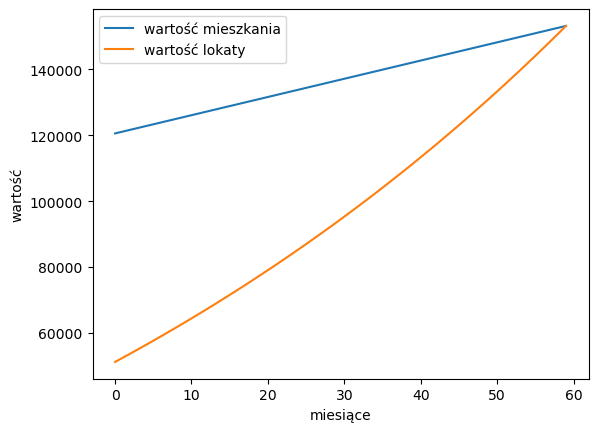

In [34]:
plt.plot(arr_value_house,label='wartość mieszkania')
plt.plot(arr_deposit_value,label='wartość lokaty')
plt.legend()
plt.xlabel('miesiące')
plt.ylabel('wartość')